##Частина друга: Аналіз файлів

Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
data = pd.read_csv("/content/2017_jun_final.csv")

Прочитайте отриману таблицю, використовуючи метод head:

In [7]:
data.head(5)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape:

In [8]:
data.shape

(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes:

In [9]:
data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum):

In [20]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування":

In [21]:
null_col=data.isnull().sum()
null_col=null_col[data.isnull().sum()>0]
idx=null_col.index
data.drop(idx[1:], axis=1,inplace=True)
# data.drop(data.iloc[:, 3:], inplace=True, axis=1)

data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування":

In [22]:
data.isnull().sum()
data.shape

(8704, 20)

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna:

In [23]:
data = data.dropna()

Визначте новий розмір таблиці за допомогою методу shape:

In [24]:
data.shape

(4854, 20)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python:

In [25]:
python_data = data[data["Язык.программирования"] == 'Python']

python_data.head(2)

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900


Визначте розмір таблиці python_data за допомогою методу shape:

In [26]:
python_data.shape

(207, 20)

Використовуючи метод groupby, виконайте групування за стовпчиком "Посада":

In [27]:
grouped = python_data.groupby(by=["Должность"]).sum(numeric_only=True)
grouped

,N,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Возраст,Еще.студент,exp,current_job_exp,salary
Должность,,,,,,,,
Junior Software Engineer,224221,35333,11405,1523,24,55.25,33.00,35333
Senior Software Engineer,148238,105000,13380,901,1,207.00,48.25,105000
Software Engineer,366884,179907,47983,2663,13,318.00,112.75,179907
System Architect,13978,8000,0,71,0,20.00,2.25,8000
Technical Lead,59072,34825,5005,331,0,78.00,37.25,34825


Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць":

In [29]:
grouped_by_position = grouped.groupby("Должность").agg(
    min_salary=("Зарплата.в.месяц", "min"),
    max_salary=("Зарплата.в.месяц", "max"),
)
grouped_by_position["min_salary"] = grouped_by_position["min_salary"].map('{:,d}'.format)
grouped_by_position["max_salary"] = grouped_by_position["max_salary"].map('{:,d}'.format)

print(grouped_by_position)

                         min_salary max_salary
Должность                                     
Junior Software Engineer     35,333     35,333
Senior Software Engineer    105,000    105,000
Software Engineer           179,907    179,907
System Architect              8,000      8,000
Technical Lead               34,825     34,825


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg":

In [30]:
def fill_avg_salary(salary):
  return salary.mean().round(1)

In [31]:
avg = python_data.groupby('Должность')['Зарплата.в.месяц'].apply(fill_avg_salary)
grouped['avg']=avg # add a new column
grouped

,N,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Возраст,Еще.студент,exp,current_job_exp,salary,avg
Должность,,,,,,,,,
Junior Software Engineer,224221,35333,11405,1523,24,55.25,33.00,35333,560.8
Senior Software Engineer,148238,105000,13380,901,1,207.00,48.25,105000,3387.1
Software Engineer,366884,179907,47983,2663,13,318.00,112.75,179907,1799.1
System Architect,13978,8000,0,71,0,20.00,2.25,8000,4000.0
Technical Lead,59072,34825,5005,331,0,78.00,37.25,34825,3165.9


Створіть описову статистику за допомогою методу describe для нового стовпчика:

In [36]:
grouped['avg'].describe().map('{:,.2f}'.format)

count        5.00
mean     2,582.58
std      1,387.27
min        560.80
25%      1,799.10
50%      3,165.90
75%      3,387.10
max      4,000.00
Name: avg, dtype: object

Збережіть отриману таблицю в CSV файл:

In [37]:
grouped.to_csv('Average_salary_2017.csv')

##***Graphs***:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

<ipython-input-35-6bf754b8c74b>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Pastel1')(np.linspace(0, 1, len(data)))


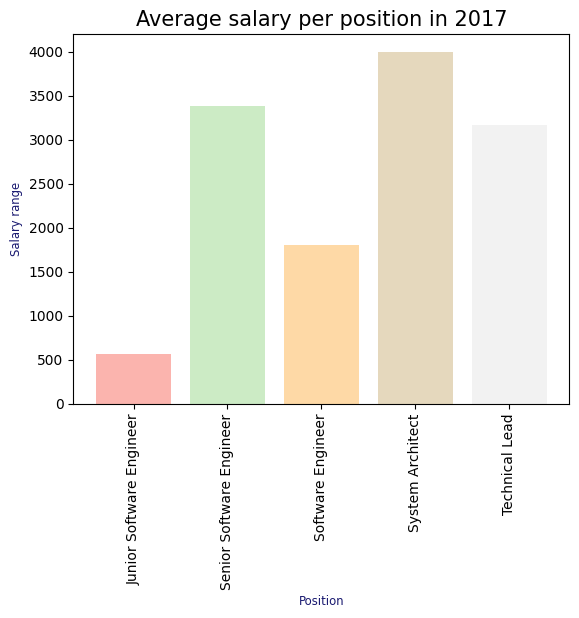

In [35]:
data = grouped.groupby('Должность')['avg'].mean().reset_index()

colors = plt.cm.get_cmap('Pastel1')(np.linspace(0, 1, len(data)))
plt.bar(data['Должность'], data['avg'], color=colors)
plt.xlabel("Position", fontsize="small", color="midnightblue")
plt.ylabel("Salary range", fontsize="small", color="midnightblue")
plt.title("Average salary per position in 2017", fontsize=15)

plt.xticks(rotation=90)

plt.show()

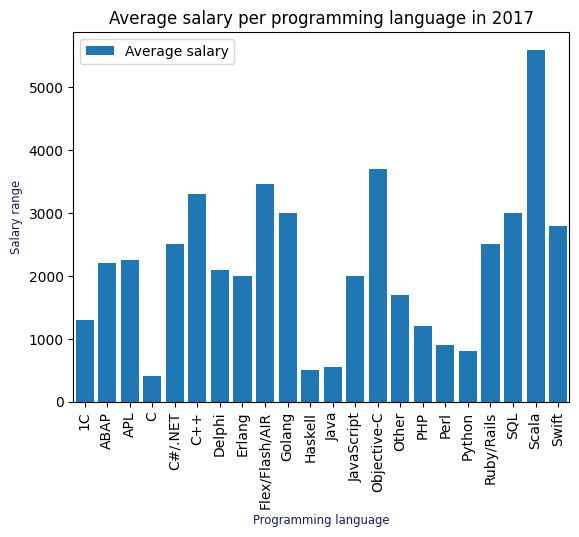

In [17]:
data.drop_duplicates(subset='Язык.программирования', keep='first', inplace=True)

grouped_data = data.groupby("Язык.программирования")["Зарплата.в.месяц"].mean()

table = grouped_data.plot(kind='bar')
plt.bar(grouped_data.index, grouped_data.values)

table.set_title("Average salary per programming language in 2017", color='black')
table.legend(['Average salary'], loc='best')

table.set_xlabel('Programming language', fontsize="small", color="midnightblue")
table.set_ylabel('Salary range', fontsize="small", color="midnightblue")

plt.xticks(rotation=90)
plt.show()

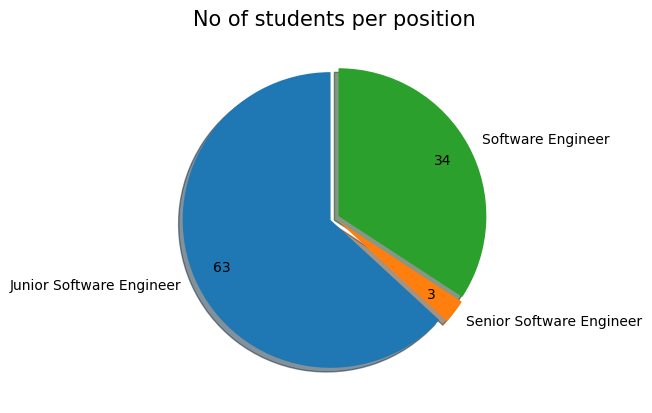

In [16]:
students = python_data[python_data['Еще.студент']].groupby('Должность').count().reset_index()

explode = [0.03, 0.03, 0.03]

plt.pie(
    students['Еще.студент'].values,
    labels=students['Должность'].values,
    shadow=True,
    explode=explode,
    autopct="%.0f",
    pctdistance=0.8,
    labeldistance=1.1,
    startangle=90
)

plt.title("No of students per position", fontsize=15)

plt.show()